In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import seaborn as sns 

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Loan Prediction Model.ipynb',
 'test_loan.csv',
 'train_loan.csv']

In [3]:
df=pd.read_csv( 'train_loan.csv',encoding='Latin-1')

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe() # Get summary of numerical varibales 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Results from above 
# 1. LoanAmount-- missing values(614-592)= 
# 2. Loan_Amount_Term--missing values(614-600)=
# 3. Credit_History--missing values(614-564)=
# 4. Almost 84% candidates have a credit history
# 5. In case where there is no credit hostory, there is no coapplicanIncome and the loan amount is less

In [7]:
# We can check for frequency distribution of columns :Credit_History,Property_Area,Loan_Status,Dependents
#  & Education to know the better about these columns

In [8]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
# Similarly we can do for multiple columns such as:

In [10]:
# df['Property_Area'],df['Loan_Status'],df['Dependents'],df['Education']/.value_counts()

# Distribution Analysis

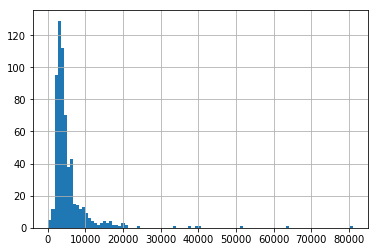

In [11]:
df['ApplicantIncome'].hist(bins=100)

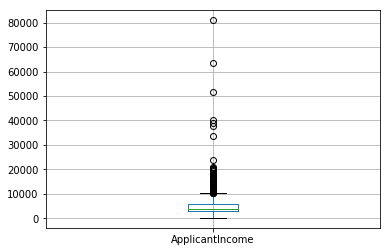

In [12]:
df.boxplot(column='ApplicantIncome')

In [13]:
# This clearly depicts that we have outliers in this columns. Pay attention that most of the people have incomes 
# under 10,000 and rest all with dots are the outliers falling above the IQR with max salary as 80,000

# To study data having outliers it is recommended we pay attention to the median and not to mean as mean tends to change 
# drastically with outlier and will not show correct data information


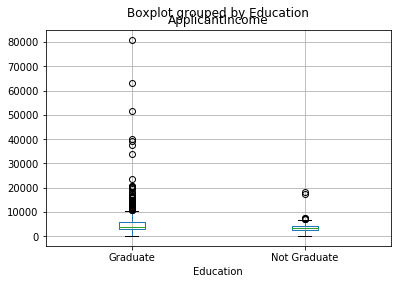

In [14]:
df.boxplot(column='ApplicantIncome',by='Education')

In [15]:
# No substantial difference between mean income of Graduates & not Graduates, however higher number of Graduates with very
# high incomes 

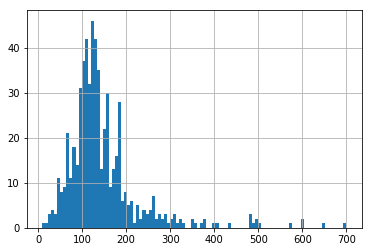

In [16]:
df['LoanAmount'].hist(bins=100)

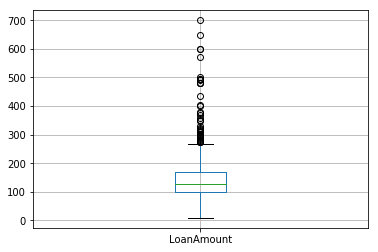

In [17]:
df.boxplot(column='LoanAmount')

In [18]:
# Outliers in this field gives us a hint that median loan amount is between 100 & 200
# There seems multiple outliers lets se how many do we have here.

In [19]:
Q1=df.LoanAmount.quantile(0.25)
Q1

100.0

In [20]:
Q3=df.LoanAmount.quantile(0.75)
Q3

168.0

In [21]:
IQR=Q3-Q1
IQR

68.0

In [22]:
Outlier_LoanAmount=(df['LoanAmount']<(Q1-(1.5*IQR)))|(df['LoanAmount']>(Q3+(1.5*IQR)))

In [23]:
Outlier_LoanAmount.value_counts()

False    575
True      39
Name: LoanAmount, dtype: int64

In [24]:
# Lets Understand Categorical Variables in more details

In [25]:
tmp1=df['Credit_History'].value_counts(ascending=True)
tmp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

In [26]:
print('Frequency table credit history')
tmp1

Frequency table credit history


0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [27]:
print('Probability of getting loan')
tmp2

Probability of getting loan


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [28]:
# We can also use matplotlib library to plot similar figure just like pivot 

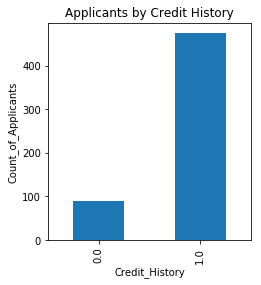

In [29]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count_of_Applicants')
ax1.set_title('Applicants by Credit History')
tmp1.plot(kind='bar')

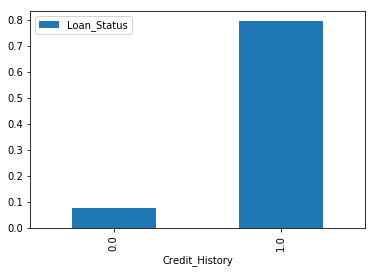

In [30]:
ax2=fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by credit card')
tmp2.plot(kind='bar')

In [31]:
df.loc[(df['Married']=='nan'),['Married']]

,Married


In [32]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [33]:
def missing_values(x):
    return sum(x.isnull())


df.apply(missing_values,axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [35]:
from scipy.stats import mode

In [36]:
mode(df['Married']).mode[0]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Yes'

In [37]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [38]:
df['Married'].fillna(mode(df['Married']).mode[0],inplace=True)

In [39]:
tmp3=df['Married'].value_counts(ascending=True)
tmp4=df.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x:x.map({'Yes':1,'No':0}).mean())

In [40]:
tmp3

No     213
Yes    401
Name: Married, dtype: int64

In [41]:
tmp4

""
Married


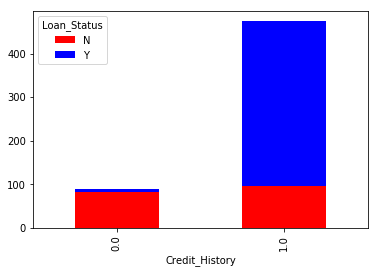

In [42]:
temp1=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp1.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [43]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
def nan_val(x):
    return sum(x.isnull())

In [45]:
df.apply(nan_val,axis=0)

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [48]:
# df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
# CAREFUL HERE, THIS COULD BE A EASY GETAWAY FROM SITUATION,But pay attention to the Boxplot in line 17 where we had many outliers
# in the'loan amount' columns,and we do not want to distribute unrealistic data by using mean where outliers are significant
# so we will fill the values using Median operation which is better 

In [49]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [50]:
# df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

# we are marking this down bcz there is a better 
# way to impute missing value than this (mentioned in In:60-67) 

In [51]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


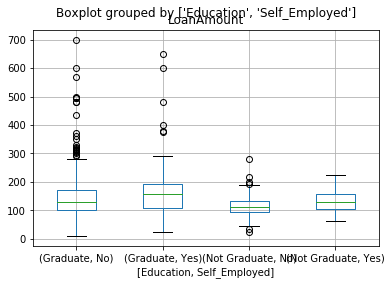

In [52]:
df.boxplot(column='LoanAmount',by=['Education','Self_Employed'])

In [53]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [54]:
# As Sel_Employed column has 'No' as the most counts,is is better to impute values with maximum frequesncy

In [55]:
# df['Self_Employed'].fillna('No')  #Easy Way 
df['Self_Employed'].fillna(mode(df['Self_Employed']).mode[0],inplace=True) #Logical Way 

In [56]:
df['Self_Employed'].isna().sum() #check for missing values in mode:'Self_Employed'  column


0

In [57]:
mode(df['Self_Employed']).mode[0]

'No'

In [58]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
# Let us try and understand that If we get the median value of feature: 'Education' & 'Sel_Employed'
# we can prettyy much handle the outlier negation and impute missing values in column 'LoanAmount'

In [60]:
table=df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)

In [61]:
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [62]:
#Define a function to retun value of the Pivot_Table shown above

In [63]:
def ret_med(x):
    return table.loc[x['Self_Employed'],x['Education']]

In [64]:
#Now lets impute the missing values from above function to the 'LoanAmount' column

In [65]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(ret_med,axis=1),inplace=True)

# NOTE : This method will work only if you have not filled the missing values in Loan_Amount variable using the 
# previous approach, i.e. using mean

In [66]:
df['LoanAmount'].isna().sum()

0

In [67]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
# Now lets analyze'Loan_Amount_Term'. To nullify an outlier's effect in cases where outliers shall not be removed and 
# oulier value might be for a specific need, we can use the logarithmic function to use even the outlier value.Lets do it below 

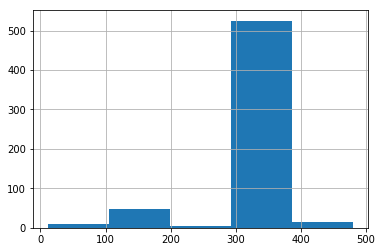

In [69]:
df['Loan_Amount_Term'].hist(bins=5)

In [70]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

                               

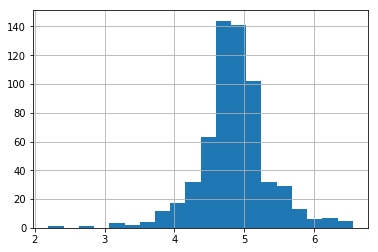

In [71]:
df['LoanAmount_log'].hist(bins=20)

In [72]:
# Now lets look into 'ApplicantIncome' column. A hypothesis is that some candidates might have low income but might have 
# high COApplicant income, so we can add both the income as total income and put a logarithmic transformation

In [73]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [74]:
df['Total_Income_log']=np.log(df['Total_Income'])

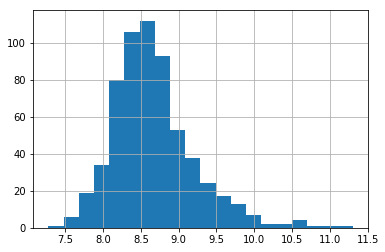

In [75]:
df['Total_Income_log'].hist(bins=20)

In [76]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [77]:
 df.Gender.isna().sum()


13

In [78]:
df['Gender'].fillna(mode(df['Gender']).mode[0],inplace=True)

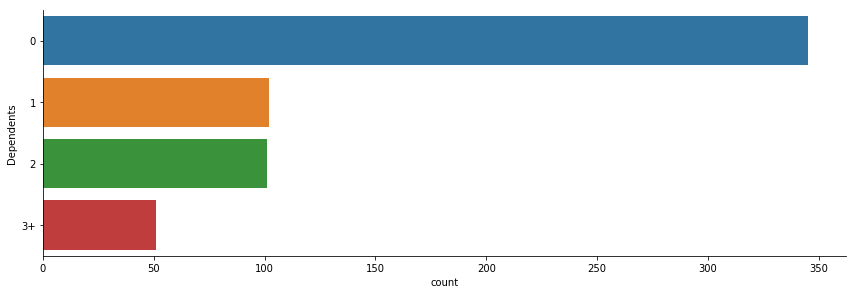

In [79]:
sns.catplot(y='Dependents',
           kind='count',
           height=4,
           aspect=3,
           data=df,
           order=df.Dependents.value_counts().index)

In [80]:
#We see that most of the candidates have '0' dependents and with dependency count increasing fro '0'---'3+', we have
#we have less count of people in our data set[we have 15 missing values in 'Dependents' column, lets]

In [81]:
# we can go ahead and take mode value to fill the missing ones

In [82]:
df['Dependents'].fillna(mode(df['Dependents']).mode[0],inplace=True)

In [83]:
df['Dependents'].isna().sum()

0

In [84]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
Total_Income          0
Total_Income_log      0
dtype: int64

In [85]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [86]:
df.Credit_History.isna().sum()

50

In [87]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [88]:
df['Credit_History'].fillna('1.0',inplace=True)

In [89]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [90]:
df.Loan_Amount_Term.mean()

342.0

In [91]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [92]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
Total_Income_log     0
dtype: int64

In [93]:
# All the missing values are imputed correctly.

In [94]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1,Urban,Y,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,4.948760,6000.0,8.699515


In [95]:
# Time to create a Predictive Model .Skicit-Learn (sklearn) is the most commonly used library in Python
# for this purpose and we will follow the trail. I encourage you to get a refresher on sklearn through this article.

In [96]:
# Skicit-learn requires all inputs to be numeric in nature hence we shall convert all categorical varibles 
# into numerics. This can be done by encoding different categories to numerical.

Text(0.5, 1.0, 'Corelation')

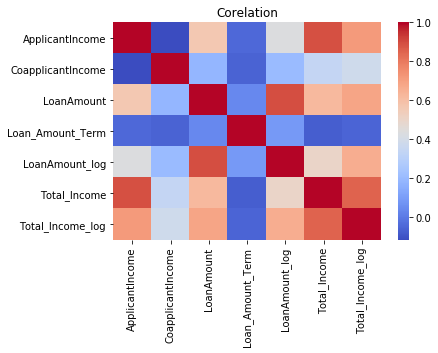

In [97]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Corelation')

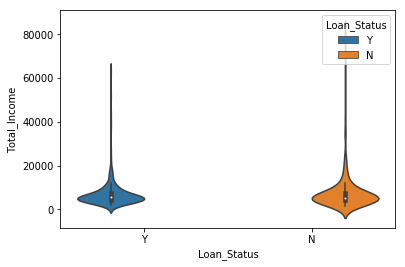

In [98]:
sns.violinplot(x='Loan_Status',y='Total_Income',hue='Loan_Status',data=df)
plt.show()

In [99]:
from sklearn import preprocessing

In [100]:
le=preprocessing.LabelEncoder()

In [101]:
# Below is an example as to  how label encoder converts categorical to numerical the data in a column 

In [102]:
encoded_value=le.fit_transform(['Ajay','Vijay','Kumar','Ajay'])

In [103]:
encoded_value

array([0, 2, 1, 0], dtype=int64)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
Total_Income         614 non-null float64
Total_Income_log     614 non-null float64
dtypes: float64(6), int64(1), object(9)
memory usage: 76.8+ KB


In [105]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1,Urban,Y,4.867534,5849.0,8.674026


In [106]:
print("Gender:",df['Gender'].unique())
print("Married:",df['Married'].unique())
print("Education:",df['Education'].unique())
print("Self_Employed:",df['Self_Employed'].unique())
print("Property_Area:",df['Property_Area'].unique())
print("Loan_Status:",df['Loan_Status'].unique())
print("Dependents:",df['Dependents'].unique())
print("Loan_Amount_Term:",df['Loan_Amount_Term'].unique())


Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']
Dependents: ['0' '1' '2' '3+']
Loan_Amount_Term: [360. 120. 240. 342. 180.  60. 300. 480.  36.  84.  12.]


In [107]:
df.drop(columns='Loan_ID',axis=0,inplace=True)

In [108]:
# We have now laid out the different categorical columns from the sales_data dataframe and the unique classes under each of these columns. Now, it’s time to encode these strings into numeric labels. 
# To do this, we will run the code below and then do a deep dive to understand how it works:



from sklearn import preprocessing
Le=preprocessing.LabelEncoder
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Loan_Amount_Term']=le.fit_transform(df['Loan_Amount_Term'])

In [109]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,1,0,0,0,0,5849,0.0,130.0,9,1,2,1,4.867534,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.0,9,1,0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.0,9,1,2,1,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.0,9,1,2,1,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.0,9,1,2,1,4.948760,6000.0,8.699515
5,1,1,2,0,1,5417,4196.0,267.0,9,1,2,1,5.587249,9613.0,9.170872
6,1,1,0,1,0,2333,1516.0,95.0,9,1,2,1,4.553877,3849.0,8.255569
7,1,1,3,0,0,3036,2504.0,158.0,9,0,1,0,5.062595,5540.0,8.619750
8,1,1,2,0,0,4006,1526.0,168.0,9,1,2,1,5.123964,5532.0,8.618305
9,1,1,1,0,0,12841,10968.0,349.0,9,1,1,0,5.855072,23809.0,10.077819


In [110]:
# First we need to decide what will be our Training data and what will be the Target Data, then create a 
# DataFrame where we have our training data seperate from the Target Data(this data set is not included in our part of data as
# we need to predict this one )

In [155]:
print("Loan_Status:", df['Loan_Status'].unique())

Loan_Status: [1 0]


In [111]:
cols=[col for col in df.columns if col not in ['LoanAmount_log','Total_Income_log','Loan_Status']]

In [112]:
data=df[cols]

In [113]:
target=df['Loan_Status']

In [114]:
data.head(n=2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,5849,0.0,130.0,9,1,2,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,9,1,0,6091.0


In [115]:
# Now that we have target and data , the two DataFrames available with us, lets use the train_test_split module from
# Sklearn to split our data

# for eg:

# train_data, train_target( we will select 70 % to train our alogrithm)
# test_data,test_target(we will select 30 % to test our alogorithm)

from sklearn.model_selection import train_test_split

In [116]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.3,random_state=10)

In [117]:
df.shape

(614, 15)

In [118]:
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import KFold  # for KFold cross validation 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics

# IMPLEMENTING GAUSSIAN NAIVE BAYES  OR GaussianNB

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [123]:
#create an object of the type GaussianNB

In [124]:
gnb=GaussianNB()

In [125]:
#train the algorithm on training data and predict using the testing data 

In [127]:
pred=gnb.fit(train_data,train_target).predict(test_data)

In [128]:
print(pred.tolist())

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]


In [129]:
#Print the accuracy score of the model

In [130]:
print("Naive-Bayes accuracy:",accuracy_score(test_target,pred,normalize=True))

Naive-Bayes accuracy: 0.7837837837837838


# Lets see how good the Linear SVC predicts the Model 

In [132]:
#Import the Necessary Modules

In [133]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [134]:
#create an object of type LinearSVC

In [135]:
svc_model=LinearSVC(random_state=0)

In [136]:
#train the alogorithm on training data and predict using testing data 

In [137]:
pred1=svc_model.fit(train_data,train_target).predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [138]:
# Not working properly as we can see ConvergenceWarning is there 


In [141]:
print("LinearSVC accuracy:",accuracy_score(test_target,pred1,normalize=True))

LinearSVC accuracy: 0.7297297297297297


# K-Neighbour Classifier

In [142]:
#import necessary modules 

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh=KNeighborsClassifier(n_neighbors=3)

In [145]:
pred2=neigh.fit(train_data,train_target).predict(test_data)

In [146]:
print("KNeighbors accuracy score:", accuracy_score(test_target,pred2,normalize=True))

KNeighbors accuracy score: 0.6270270270270271


In [147]:
# Now that we have implemented all the algorithms in our list, 
# we can simply compare the scores of all the models to select the model with the highest score. 
# But wouldn’t it be nice if we had a way to visually compare the performance of the different models? 

# We can use the yellowbrick library in scikit-learn,
# which provides methods for visually representing different scoring methods.

# VISUALIZING MODEL PERFROMANCES USING YELLOW BRICK LIBRARY FROM SCIKIT-LEARN

In [148]:
# Lets use ClassificationReport class prvided by the Yellowbrick library to give us visual report of model performance

# GaussianNB

In [151]:
!pip install yellowbrick
from yellowbrick.classifier import ClassificationReport

In [152]:
#Instantiate the classification model and Visualizer 

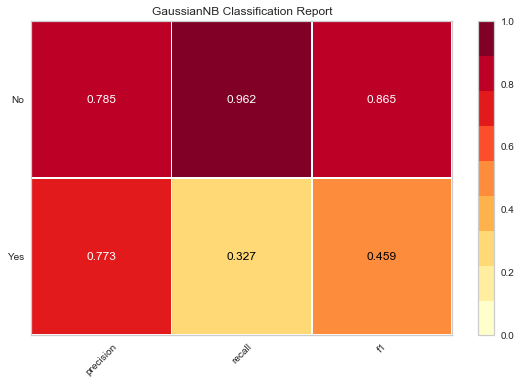

In [158]:
visualizer=ClassificationReport(gnb,classes=['Yes','No'])
#fit the training data to the visualizer 
visualizer.fit(train_data,train_target)
#Evaluate the model on testing data
visualizer.score(test_data,test_target)
# Draw the data 
p=visualizer.poof()


# LinearSVC

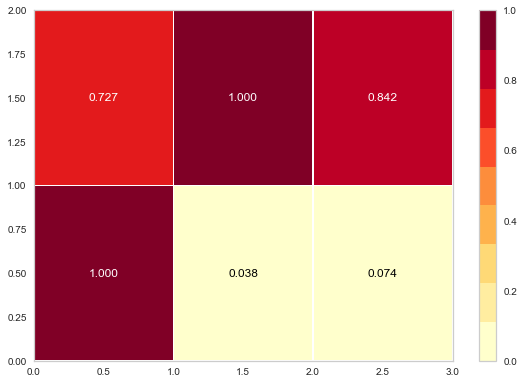

In [159]:
from yellowbrick.classifier import ClassificationReport
visualizer1=ClassificationReport(svc_model,classe=['Yes','No'])
visualizer1.fit(train_data,train_target)
visualizer1.score(test_data,test_target)
S=visualizer.poof()

# KNeighbors Classifier 

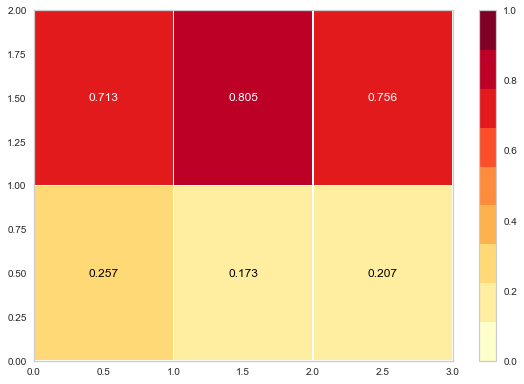

In [160]:
from yellowbrick.classifier import ClassificationReport
visualizer2=ClassificationReport(neigh,classes=['Yes','No'])
visualizer2.fit(train_data,train_target)
visualizer2.score(test_data,test_target)
K=visualizer.poof()